In [84]:
# Plot mutation matrix and selection surface
# Colormap referece: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

%pylab inline
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/'

Populating the interactive namespace from numpy and matplotlib


In [85]:
# Mutation and selection models used (for reference)
period_info = {}

# L values
L1_log = 0.04
L2_log = 0.15 
L3_log = 0.65 
L4_log = 0.45 

# mu, beta, p, L, ru corresponding to mu
period_info[1] = [10**-4.2, 0.5, 1, L1_log, 13]
period_info[2] = [10**-5, 0.3, 0.6, L2_log, 6]
period_info[3] = [10**-7, 0.3, 0.9, L3_log, 5]
period_info[4] = [10**-6, 0.3, 0.9, L4_log, 3]

In [86]:
def main():
    
    # Set parameters
    # Simulation parameters
    num_alleles = 25
    
    # Mutation and selection model parameters
    mu = 10**-4
    beta = 0.3
    p = 0.9
    L = 0.65
    s = 0.01
    
    # Different colormap options: 'binary', 'hot_r', 'Blues', 'YlGnBu', 'Greens', 'viridis', 'cool'
    colormap = 'PuBuGn' 
    PARAM_is_w_additive = True # Whether the fitness matrix of genotypes is additive or multiplicative
        
    # Get transition matrix (constant)
    transition_matrix = GetTransitionMatrix(num_alleles, mu, beta, p, L)
    
    # Visualize transition matrix 
    tick_spacing = 2
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    im = ax.imshow(np.log10(transition_matrix), cmap=colormap) 
    label_list = list(range(-1*int(num_alleles/2), int(num_alleles/2)+1, tick_spacing))
    label_list.insert(0, 0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xticklabels(label_list) 
    ax.set_yticklabels(label_list)
    ax.set_xlabel('To allele')
    ax.set_ylabel('From allele')
    ax.set_title("Mutation matrix\nbeta=%.2f, p=%.2f, mu=%.2E, L=%.2f"%(beta, p, mu, L))
    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel('Log 10 transition probability')
    plt.savefig(PLOTDIR + 'mutation_matrix/with_eps/mutation_matrix_%s_beta_%.2f_p_%.2f_mu_%.2E_L_%.2f.pdf'%(colormap, beta, p, mu, L), bbox_inches='tight')

    # Get fitness matrix for each allele pair (genotype)
    fitness_matrix = GetFitnessMatrix(num_alleles, s, PARAM_is_w_additive)
    
    # Visualize diploid selection surface
    tick_spacing = 2
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    im = ax.imshow(fitness_matrix, cmap=colormap)
    label_list = list(range(-1*int(num_alleles/2), int(num_alleles/2)+1, tick_spacing))
    label_list.insert(0, 0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xticklabels(label_list) 
    ax.set_yticklabels(label_list)
    ax.set_xlabel('Allele 1')
    ax.set_ylabel('Allele 2')
    ax.set_title("Diploid selection surface")
    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel('Fitness')
    plt.savefig(PLOTDIR + 'selection_surface/selection_surface_%s_s_%.2f.pdf'%(colormap, s), bbox_inches='tight')

CPU times: user 1.01 s, sys: 19.2 ms, total: 1.03 s
Wall time: 1.01 s


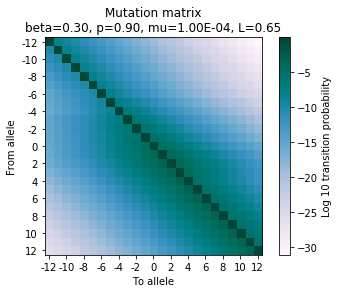

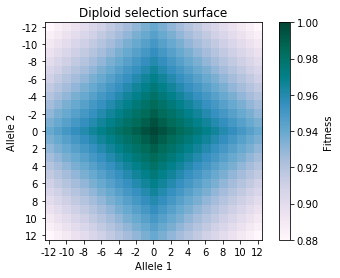

In [87]:
%%time
if __name__ == '__main__':
    main()